#Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#
import numpy as np
import os
import json
import gzip
import pandas as pd
from urllib.request import urlopen

download the data


In [ ]:
!wget http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Tools_and_Home_Improvement_5.json.gz

--2020-06-05 02:16:14--  http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Tools_and_Home_Improvement_5.json.gz
Resolving deepyeti.ucsd.edu (deepyeti.ucsd.edu)... 169.228.63.50
Connecting to deepyeti.ucsd.edu (deepyeti.ucsd.edu)|169.228.63.50|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 309844033 (295M) [application/octet-stream]
Saving to: ‘Tools_and_Home_Improvement_5.json.gz’

Tools_and_Home_Impr 100%[===================>] 295.49M  19.9MB/s    in 72s     

2020-06-05 02:17:27 (4.12 MB/s) - ‘Tools_and_Home_Improvement_5.json.gz’ saved [309844033/309844033]



#old way to read data

In [ ]:
data_path = '/content/drive/My Drive/Movies_and_TV_5.json.gz'
data = []
with gzip.open(data_path) as f:
    for l in f:
      data.append(json.loads(l.strip()))

In [ ]:
# total length of list, this number equals total number of products
print(len(data))

# first row of the list
print(data[0])

3410019
{'overall': 5.0, 'verified': True, 'reviewTime': '11 9, 2012', 'reviewerID': 'A2M1CU2IRZG0K9', 'asin': '0005089549', 'style': {'Format:': ' VHS Tape'}, 'reviewerName': 'Terri', 'reviewText': "So sorry I didn't purchase this years ago when it first came out!!  This is very good and entertaining!  We absolutely loved it and anticipate seeing it repeatedly.  We actually wore out the cassette years back, so we also purchased this same product on cd.  Best purchase we made out of all!  Would purchase on dvd if we could find one.", 'summary': 'Amazing!', 'unixReviewTime': 1352419200}


convert list to dataframe

In [ ]:
# convert list into pandas dataframe
df = pd.DataFrame.from_dict(data)

In [ ]:
data.clear()

remove not required columns

In [ ]:
df.drop(['verified','reviewTime','reviewerID','asin','style','reviewerName','unixReviewTime','image'], axis=1, inplace=True)

In [ ]:
df.head()

,overall,reviewText,summary,vote
0,5.0,So sorry I didn't purchase this years ago when...,Amazing!,NaN
1,5.0,Believe me when I tell you that you will recei...,Great Gospel VHS of the Cathedrals!,NaN
2,5.0,"I have seen X live many times, both in the ear...",A great document of a great band,11
3,5.0,"I was so excited for this! Finally, a live co...",YES!! X LIVE!!,5
4,5.0,X is one of the best punk bands ever. I don't ...,X have still got it,5


In [ ]:
#we need summary or vote?
df.drop(['summary','vote'], axis=1, inplace=True)

In [ ]:
df.head()

,overall,reviewText
0,5.0,So sorry I didn't purchase this years ago when...
1,5.0,Believe me when I tell you that you will recei...
2,5.0,"I have seen X live many times, both in the ear..."
3,5.0,"I was so excited for this! Finally, a live co..."
4,5.0,X is one of the best punk bands ever. I don't ...


delete nulls

In [ ]:
df.isnull().sum(axis = 0)

overall          0
reviewText    1581
dtype: int64

In [ ]:
df.dropna(axis=0, inplace=True)

In [ ]:
df.isnull().sum(axis = 0)

overall       0
reviewText    0
dtype: int64

In [ ]:
df.head()

,overall,reviewText
0,5.0,So sorry I didn't purchase this years ago when...
1,5.0,Believe me when I tell you that you will recei...
2,5.0,"I have seen X live many times, both in the ear..."
3,5.0,"I was so excited for this! Finally, a live co..."
4,5.0,X is one of the best punk bands ever. I don't ...


In [ ]:
print(len(df))

3408438


#fast way to read data


In [ ]:
data_path = '/content/drive/My Drive/Movies_and_TV_5.json.gz'
overall = []
reviewText = []
with gzip.open(data_path) as f:
  for l in f:
    obj = json.loads(l.strip())
    if "reviewText" in obj:
      overall.append(obj["overall"])
      reviewText.append(obj["reviewText"])

In [ ]:
data = {'overall':overall,
        'reviewText':reviewText}

In [ ]:
df = pd.DataFrame(data)

In [ ]:
overall.clear()
reviewText.clear()
data.clear()

In [ ]:
df = df[df.overall != 0.0]

In [ ]:
df['overall'] = df['overall'].astype(int)

In [ ]:
print(len(df))

3408438


In [ ]:
df.head(10)

,overall,reviewText
0,5,So sorry I didn't purchase this years ago when...
1,5,Believe me when I tell you that you will recei...
2,5,"I have seen X live many times, both in the ear..."
3,5,"I was so excited for this! Finally, a live co..."
4,5,X is one of the best punk bands ever. I don't ...
5,5,I've loved X since I first saw them here in Sa...
6,5,I must admit I was hesitant to purchase this D...
7,5,The little ones love this
8,3,Good songs. The DVD is a little boring.
9,5,The DVD came in great condition and provided l...


In [ ]:
df['reviewText'].iloc[[3]].values[0]

'So far I hooked it up and tested it , filled a five gallon bucket with hot water, it is the perfect temp for a shower,the flow valve that came with it broke when i tried to tighten it to get it to stop leaking,just hooked it directly to sharkbite pex fitting,seems to work fine without the valve. it is hooked up to a 2 poll 20 amp breaker, will have to wait till the rest of my bathroom is finished to give a better review.'

show unique values in overall and its count

In [ ]:
df.overall.value_counts()

5    1424804
4     335321
3     139446
1      97831
2      72907
Name: overall, dtype: int64

#prepossessing

preprocessing for rewiew len

In [ ]:
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
stops = set(stopwords.words("english")) - {'no' , 'not'}
#stops

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def cleaned_text_method2(text):

    cleaned_text = re.sub('http.*','',text)

    # specific
    cleaned_text = re.sub(r"won\'t", "will not", cleaned_text)
    cleaned_text = re.sub(r"can\'t", "can not", cleaned_text)

    # general
    cleaned_text = re.sub(r"n\'t", " not", cleaned_text)
    cleaned_text = re.sub(r"\'re", " are", cleaned_text)
    cleaned_text = re.sub(r"\'s", " is", cleaned_text)
    cleaned_text = re.sub(r"\'d", " would", cleaned_text)
    cleaned_text = re.sub(r"\'ll", " will", cleaned_text)
    cleaned_text = re.sub(r"\'t", " not", cleaned_text)
    cleaned_text = re.sub(r"\'ve", " have", cleaned_text)
    cleaned_text = re.sub(r"\'m", " am", cleaned_text)
    
    cleaned_text = cleaned_text.lower()

    cleaned_text = " ".join([w for w in cleaned_text.split() if not w in stops])
    
    cleaned_text = re.sub("[^a-zA-Z]", " ",cleaned_text)

    #cleaned_text = " ".join([w for w in cleaned_text.split() if len(w) > 1])

    cleaned_text = re.sub('\s+',' ',cleaned_text)
                              
    return cleaned_text 

In [ ]:
#df1, df2, df3 = np.array_split(df, 3)

In [ ]:
#df['reviewText'][0:9053753] = df['reviewText'][0:9053753].apply(lambda x: cleaned_text_method2(x))

In [ ]:
#df['reviewText'][9053753:18107506] = df['reviewText'][9053753:18107506].apply(lambda x: cleaned_text_method2(x))

In [ ]:
#df['reviewText'][18107506:] = df['reviewText'][18107506:].apply(lambda x: cleaned_text_method2(x))

In [ ]:
df['reviewText'] = df['reviewText'].apply(lambda x: cleaned_text_method2(x))

In [ ]:
df.head()

,overall,reviewText
0,5,book beautiful photos good understandable dire...
1,5,loved approach book paperback easy use inspiri...
2,5,great
3,5,always love way eva thinks fun designs book ea...
4,5,nice patterns


In [ ]:
count = df['reviewText'].str.split().str.len()

In [ ]:
import operator
max_index, max_value = max(enumerate(count), key=operator.itemgetter(1))

In [ ]:
print(max_index)
print(max_value)

689
199


In [ ]:
#max(count)
#print(np.argmax(count))

6061

In [ ]:
print(count.shape)

(3408438,)


In [ ]:
len(df['reviewText'].iloc[[298859]].values[0].split())

3489

In [ ]:
df['reviewText'].iloc[[298859]].values[0]

'sweet aholic main downfall comes eating healthy portion control love chocolate decided one day google healthiest chocolate stumbled across vitalicious products people making seem like best things earth taste like regular muffins brownies healthy plus could walked minutes made happy despite huge pricetag decided purchase babies anyway make review useful decided eat daily post opinions flavor eat so updated review flavor rate to give idea sweet tooth taste palette really really love chocolate favorite desserts probably chocolate cake devils food vanilla frosting hot apple pie vanilla ice cream brownie ice cream love chocolate chip cookies fan candy bars enjoy pizza hut cinnamon sticks krispy kreme doughnuts even though not get eat things anymore love contents super sampler multibran bluebran banana nut cranbran appleberry golden corn vitabrownies double chocolate double chocolate dream chocolate fig fudgy peanut butter chip vitabrownies taste like cake made apple sauce instead oil splen

draw freq of len

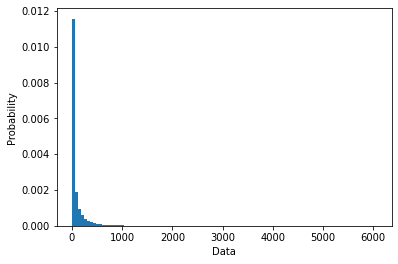

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
np.random.seed(42)
x = count
plt.hist(x, density=True, bins=100)  # `density=False` would make counts
plt.ylabel('Probability')
plt.xlabel('Data');

{'boxes': [<matplotlib.lines.Line2D at 0x7ff88fa00588>],
 'caps': [<matplotlib.lines.Line2D at 0x7ff88d7ae240>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff88d7aecc0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7ff88d7ae940>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7ff88fa00898>,
  <matplotlib.lines.Line2D at 0x7ff88fa00c18>]}

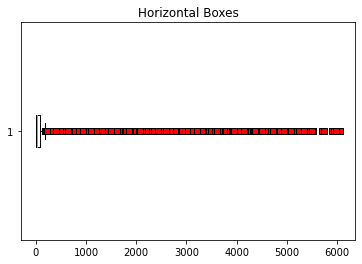

In [ ]:
red_square = dict(markerfacecolor='r', marker='s')
fig5, ax5 = plt.subplots()
ax5.set_title('Horizontal Boxes')
ax5.boxplot(count, vert=False, flierprops=red_square)

get outliers

In [ ]:
sorted(count)
q1, q3= np.percentile(count,[25,75])
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 
print(lower_bound)
print(upper_bound)

-102.5
189.5


In [ ]:
print('% of outliers = ', (count > upper_bound).sum() / len(count))
print('number of outliers = ', (count > upper_bound).sum())
print('number of good len = ', (count <= upper_bound).sum())

% of outliers =  0.12208700877058641
number of outliers =  416126
number of good len =  2992312


draw after remove outliers


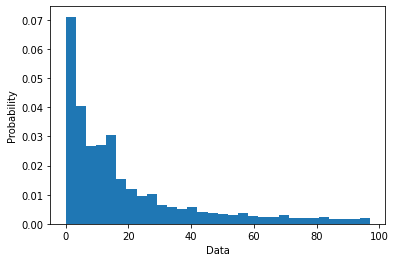

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
np.random.seed(42)
x = count[count<=upper_bound]
plt.hist(x, density=True, bins=30)  # `density=False` would make counts
plt.ylabel('Probability')
plt.xlabel('Data');

{'boxes': [<matplotlib.lines.Line2D at 0x7fd588a19278>],
 'caps': [<matplotlib.lines.Line2D at 0x7fd588795e10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd5885308d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fd588509ef0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fd588ace208>,
  <matplotlib.lines.Line2D at 0x7fd588b66128>]}

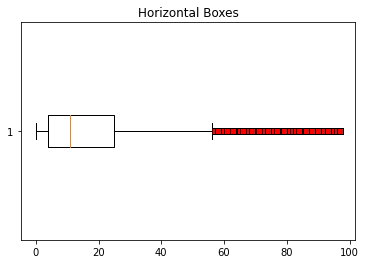

In [ ]:
red_square = dict(markerfacecolor='r', marker='s')
fig5, ax5 = plt.subplots()
ax5.set_title('Horizontal Boxes')
ax5.boxplot(count[count<=upper_bound], vert=False, flierprops=red_square)

60% of rewiew contains less than 40 space(word)

In [ ]:
print('% of ex of good len = ', (count < 100).sum() / len(count))
print('number of outliers = ', (count >= 100).sum())
print('number of good len = ', (count < 100).sum())

% of ex of good len =  0.9876591560902575
number of outliers =  139150
number of good len =  11136416


get the final dataframe

In [ ]:
#for other dataset
upper_bound = 200

In [ ]:
count = df['reviewText'].str.split().str.len() #becouse i sorted it in calc outliers

In [ ]:
df = df[count<=upper_bound]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [ ]:
len(df)

405159

In [ ]:
#verify = df['reviewText'].str.split().str.len()

In [ ]:
#(verify > upper_bound).sum()

0

save df

In [ ]:
data_frame_name = '/content/drive/My Drive/Movies_and_TV_filterd_df_200.pkl'
df.to_pickle(data_frame_name)

large dataframe

In [ ]:
#df_arr = np.array_split(df, 28)

In [ ]:
#len(df_arr)

28

In [ ]:
new = []
count = []
for obj in df_arr:
  count = obj['reviewText'].str.split().str.len()
  new.append(obj[count<upper_bound])

In [ ]:
print(len(df))
for obj in new:
  print(len(obj))

27161259
818298
812935
800908
794976
819766
807879
833758
818742
826491
811935
798575
838782
822379
793924
854159
882451
850500
880402
853362
801862
807972
827993
848328
856367
825510
827772
841284
828052


In [ ]:
print(len(df))
for obj in df_arr:
  print(len(obj))

27161259
970045
970045
970045
970045
970045
970045
970045
970045
970045
970045
970045
970045
970045
970045
970045
970045
970045
970045
970045
970045
970045
970045
970045
970045
970045
970045
970045
970044


save dataframe

In [ ]:
newdf =  np.concatenate(new, axis=0)

In [ ]:
newdf = pd.DataFrame(newdf)

In [ ]:
print(len(newdf))

23185362


In [ ]:
newdf.columns = ['overall','reviewText']

In [ ]:
newdf.tail()

,overall,reviewText
23185357,5,found five stories collection well written tho...
23185358,5,great book enthralling stories keep wanting kn...
23185359,5,count one hand number books literally blown mi...
23185360,5,thought author could not come another thriller...
23185361,5,another amazing book ernst sequels not always ...


In [ ]:
df.tail()

,overall,reviewText
11275561,5,item described works well light scarf material...
11275562,5,nice soft touch
11275563,5,scarf everything expected material good longer...
11275564,5,no better way say without blunt as woman large...
11275565,5,beautiful scarf light weight enough warmer wea...


In [ ]:
newdf[818299:818305]

,overall,reviewText
818299,3,just got back visiting china story helped reme...
818300,5,second book author read excellent last cato th...
818301,4,enjoyed fast paced novel takes place china sea...
818302,4,enjoyable book read harder put down full myste...
818303,5,new favorite author
818304,4,book wonderful read parts seemed drag much des...


In [ ]:
data_frame_name = '/content/drive/My Drive/Books_filterd_df_100.pkl'
newdf.to_pickle(data_frame_name)

#setup final dataframe

In [ ]:
df = pd.read_pickle('/content/drive/My Drive/Video_Games_filterd_df_100.pkl')

In [ ]:
df1 = pd.read_pickle('/content/drive/My Drive/Books_filterd_df_100.pkl')
df2 = pd.read_pickle('/content/drive/My Drive/Cell_Phones_and_Accessories_filterd_df_100.pkl')
df3 = pd.read_pickle('/content/drive/My Drive/Clothing_Shoes_and_Jewelry_filterd_df_100.pkl')
df4 = pd.read_pickle('/content/drive/My Drive/Grocery_and_Gourmet_Food_filterd_df_100.pkl')
df5 = pd.read_pickle('/content/drive/My Drive/Movies_and_TV_filterd_df_100.pkl')
df6 = pd.read_pickle('/content/drive/My Drive/Tools_and_Home_Improvement_filterd_df_100.pkl')
df7 = pd.read_pickle('/content/drive/My Drive/Video_Games_filterd_df_100.pkl')

In [ ]:
df = pd.concat([df1, df2, df3, df4, df5, df6, df7], ignore_index=True, sort =False)

In [ ]:
print(len(df))

41865523


In [ ]:
df.head()

,overall,reviewText
0,5,sorry not purchase years ago first came out go...
1,5,believe tell receive blessing watching video c...
2,5,seen x live many times early days recent reuni...
3,5,excited this finally live concert video x seen...
6,5,must admit hesitant purchase dvd classic punk ...


In [ ]:
df['overall'].value_counts()

5    261587
4     67060
3     34451
1     25261
2     16800
Name: overall, dtype: int64

In [ ]:
from sklearn.utils import shuffle
min_num_of_ex = 16800

df_5 = df[df['overall'] == 5].sample(min_num_of_ex, random_state=1)

df_4 = df[df['overall'] == 4].sample(min_num_of_ex, random_state=1)

df_3 = df[df['overall'] == 3].sample(min_num_of_ex, random_state=1)

df_2 = df[df['overall'] == 2].sample(min_num_of_ex, random_state=1)

df_1 = df[df['overall'] == 1].sample(min_num_of_ex, random_state=1)

df = pd.concat([df_5, df_4, df_3, df_2, df_1], ignore_index=True, sort =False)

df = shuffle(df, random_state=42)

In [ ]:
df['overall'].value_counts()

5    137965
4    137965
3    137965
2    137965
1    137965
Name: overall, dtype: int64

In [ ]:
data_frame_name = '/content/drive/My Drive/mini_finad_filterd_df_100.pkl'
df.to_pickle(data_frame_name)

#load embeddings

download embeddings

In [ ]:
!wget http://nlp.stanford.edu/data/glove.840B.300d.zip

--2020-06-12 17:19:18--  http://nlp.stanford.edu/data/glove.840B.300d.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.840B.300d.zip [following]
--2020-06-12 17:19:18--  https://nlp.stanford.edu/data/glove.840B.300d.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.840B.300d.zip [following]
--2020-06-12 17:19:19--  http://downloads.cs.stanford.edu/nlp/data/glove.840B.300d.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2176768927 (2.0G) [application/zip

unzip

In [ ]:
!unzip "/content/drive/My Drive/Glove Dic/glove.840B.300d.zip"

Archive:  /content/drive/My Drive/Glove Dic/glove.840B.300d.zip
  inflating: glove.840B.300d.txt     


In [ ]:
#
def load_embeddings(path):
  glove_file = path
  with open(glove_file, 'r') as f:
    words = set()
    word_to_vec_map = {}
    for line in f:
      line = line.strip().split()
      if (len(line)) == 51:
        curr_word = line[0]
        words.add(curr_word)
        word_to_vec_map[curr_word] = np.array(line[1:], dtype=np.float64)
    
    i = 1
    word_to_index = {}
    index_to_words = {}
    for w in sorted(words):
      word_to_index[w] = i
      index_to_words[i] = w
      i = i + 1
  return word_to_index, index_to_words, word_to_vec_map

In [ ]:

def load_embeddings(path):
  glove_file = path
  with open(glove_file, 'r') as f:
    words = set()
    word_to_vec_map = {}
    for line in f:
      line = line.strip().split()
      curr_word = line[0]
      words.add(curr_word)
      word_to_vec_map[curr_word] = np.array(line[1:], dtype=np.float64)
    
    i = 1
    word_to_index = {}
    index_to_words = {}
    for w in sorted(words):
      word_to_index[w] = i
      index_to_words[i] = w
      i = i + 1
  return word_to_index, index_to_words, word_to_vec_map


In [ ]:

word_to_index, index_to_words, word_to_vec_map = load_embeddings('/content/drive/My Drive/Glove Dic/glove.6B.50d.txt')

In [ ]:
#
def get_emp_matrix(word_to_index, word_to_vec_map):
  vocab_len = len(word_to_index) + 1                  # adding 1 for pading (requirement)
  emb_dim = word_to_vec_map["cucumber"].shape[0]      # dimension of GloVe word vectors (= 50)

  emb_matrix = np.zeros((vocab_len, emb_dim))

  for word, index in word_to_index.items():
      emb_matrix[index, :] = word_to_vec_map[word]
  return emb_matrix

In [ ]:
#
emb_matrix = get_emp_matrix(word_to_index, word_to_vec_map)

In [ ]:
#
def sentences_to_indices(X, word_to_index, maxLen):

  m = X.shape[0] # number of training examples
    
  X_indices = np.zeros((m, maxLen),dtype=int)
  i = 0
  for s in X:

    sentence_words = s.split()
    
    j = 0
    
    for w in sentence_words:
      if j >= maxLen:
        break
      if w in word_to_index:
        X_indices[i, j] = int(word_to_index[w])
      j = j + 1
    i = i + 1
        
  return X_indices

#normal classfication model

##load dataframe

In [ ]:
df = pd.read_pickle('/content/drive/My Drive/finad_filterd_df_100.pkl')

In [ ]:
#
X = df['reviewText']
y = df['overall']

In [ ]:
#for other dataset
X_test = X
y_test = y

In [ ]:
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.0125, random_state=42)

In [ ]:
print(len(df))

8230755


In [ ]:
print(len(X_train))
print(len(X_test))

8127870
102885


In [ ]:
y_test.value_counts()

3    20648
5    20610
1    20580
2    20562
4    20485
Name: overall, dtype: int64

## setup X Y for training

In [ ]:
#
#maxLen = max(X_train.str.split().str.len())
maxLen = 99
print(maxLen)

99


In [ ]:
#
X_train_indices = sentences_to_indices(X_train, word_to_index, maxLen)

In [ ]:
X_train_indices.shape

(8127870, 99)

In [ ]:
y_train.value_counts()

4    1625666
2    1625589
1    1625571
5    1625541
3    1625503
Name: overall, dtype: int64

In [ ]:
y_train.head()

2712399    4
729417     5
7823495    1
8136633    1
3089961    4
Name: overall, dtype: object

In [ ]:
y_train = y_train.astype(int)

In [ ]:
#
def convert_to_one_hot(Y, C):
  Y = Y - 1
  Y = np.eye(C)[Y.values.reshape(-1)]
  return Y

In [ ]:
#
Y_train_oh = convert_to_one_hot(y_train, C = 5)

In [ ]:
Y_train_oh = Y_train_oh.astype(int)

In [ ]:
Y_train_oh[0:5]

array([[0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

In [ ]:
print(y_train.shape)
print(X_train.shape)
print(Y_train_oh.shape)
print(X_train_indices.shape)

(6584604,)
(6584604,)
(6584604, 5)
(6584604, 100)


##train

In [ ]:
#
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
maxLen = 99

In [ ]:
#
NB_WORDS = len(word_to_index)+1 # Parameter indicating the number of words we'll put in the dictionary
NB_START_EPOCHS = 15  # Number of epochs we usually start to train with
BATCH_SIZE = 1024  # Size of the batches used in the mini-batch gradient descent
MAX_LEN = maxLen  # Maximum number of words in a sequence
GLOVE_DIM = word_to_vec_map["cucumber"].shape[0]  # Number of dimensions of the GloVe word embeddings

In [ ]:
#
model=Sequential()
model.add(Embedding(NB_WORDS, GLOVE_DIM, input_length=MAX_LEN,weights=[emb_matrix], trainable=False))
model.add(LSTM(128 , return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128 , return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 99, 50)            20000050  
_________________________________________________________________
lstm (LSTM)                  (None, 99, 128)           91648     
_________________________________________________________________
dropout (Dropout)            (None, 99, 128)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 50)                6450      
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 2

In [ ]:
#
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#
# checkpoint
filepath="/content/drive/My Drive/model3.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [ ]:
#
model.load_weights('/content/drive/My Drive/model3.h5')

In [ ]:
#
model.fit(X_train_indices, Y_train_oh, validation_split=0.0125, epochs = NB_START_EPOCHS, batch_size = BATCH_SIZE, callbacks=callbacks_list)

Epoch 1/15
7838/7839 [============================>.] - ETA: 0s - loss: 1.1443 - accuracy: 0.4946
Epoch 00001: val_accuracy improved from -inf to 0.52106, saving model to /content/drive/My Drive/model3.h5
7839/7839 [==============================] - 415s 53ms/step - loss: 1.1443 - accuracy: 0.4946 - val_loss: 1.0825 - val_accuracy: 0.5211
Epoch 2/15
7838/7839 [============================>.] - ETA: 0s - loss: 1.0589 - accuracy: 0.5341
Epoch 00002: val_accuracy did not improve from 0.52106
7839/7839 [==============================] - 414s 53ms/step - loss: 1.0589 - accuracy: 0.5341 - val_loss: 1.1770 - val_accuracy: 0.4864
Epoch 3/15
7838/7839 [============================>.] - ETA: 0s - loss: 1.0390 - accuracy: 0.5430
Epoch 00003: val_accuracy improved from 0.52106 to 0.55438, saving model to /content/drive/My Drive/model3.h5
7839/7839 [==============================] - 415s 53ms/step - loss: 1.0390 - accuracy: 0.5430 - val_loss: 1.0159 - val_accuracy: 0.5544
Epoch 4/15
7838/7839 [====

In [ ]:
model.save_weights('/content/drive/My Drive/model.h5', overwrite=True)

##test

In [ ]:
#
X_test_indices = sentences_to_indices(X_test, word_to_index, maxLen)
y_test = y_test.astype(int)
Y_test_oh = convert_to_one_hot(y_test, C = 5)
Y_test_oh = Y_test_oh.astype(int)

In [ ]:
print(X_test_indices.shape)
print(Y_test_oh.shape)
print(y_test.shape)

(102885, 99)
(102885, 5)
(102885,)


In [ ]:
#
loss, acc = model.evaluate(X_test_indices, Y_test_oh)
print()
print("Test accuracy = ", acc)

3216/3216 [==============================] - 176s 55ms/step - loss: 0.9651 - accuracy: 0.5756

Test accuracy =  0.5756427049636841


In [ ]:
y_pred = model.predict(X_test_indices)

In [ ]:
y_test.head(5)

69790     5
51736     5
144337    4
680830    1
586216    1
Name: overall, dtype: int64

In [ ]:
y_pred[0:5]

array([[1.65e-02, 1.65e-01, 6.05e-01, 2.04e-01, 9.58e-03],
       [2.31e-02, 2.98e-02, 1.86e-01, 4.03e-01, 3.58e-01],
       [7.63e-02, 1.72e-01, 2.82e-01, 2.91e-01, 1.79e-01],
       [8.47e-01, 1.31e-01, 2.05e-02, 1.26e-03, 5.59e-04],
       [6.42e-01, 2.24e-01, 7.51e-02, 2.73e-02, 3.18e-02]], dtype=float32)

In [ ]:
bias = [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10]

In [ ]:
test_y_pred = np.copy(y_pred)

In [ ]:
y_pred[0]

array([3.98e-01, 5.05e-01, 9.38e-02, 3.30e-03, 4.75e-04], dtype=float32)

In [ ]:
test_y_pred[0]

array([3.98e-01, 5.05e-01, 9.38e-02, 3.30e-03, 4.75e-04], dtype=float32)

In [ ]:
test_y_pred[0] = test_y_pred[0] + 0.1

In [ ]:
from sklearn.metrics import f1_score
for i in bias:
  print(i)
  test_y_pred[:,3] = y_pred[:,3] + i
  test_y_pred[:,4] = y_pred[:,4] - i
  y_pred_bool = np.argmax(test_y_pred, axis=1) + 1
  f1 = f1_score(y_test, y_pred_bool, average='micro')
  print('F1 score: %f' % f1)
  f1 = f1_score(y_test, y_pred_bool, average='macro')
  print('F1 score: %f' % f1)
  f1 = f1_score(y_test, y_pred_bool, average='weighted')
  print('F1 score: %f' % f1)
  print("---------------")

0.0
F1 score: 0.575643
F1 score: 0.572199
F1 score: 0.572250
---------------
0.01
F1 score: 0.575740
F1 score: 0.572836
F1 score: 0.572882
---------------
0.02
F1 score: 0.575798
F1 score: 0.573445
F1 score: 0.573484
---------------
0.03
F1 score: 0.575273
F1 score: 0.573351
F1 score: 0.573387
---------------
0.04
F1 score: 0.574749
F1 score: 0.573318
F1 score: 0.573349
---------------
0.05
F1 score: 0.574447
F1 score: 0.573341
F1 score: 0.573366
---------------
0.06
F1 score: 0.574078
F1 score: 0.573244
F1 score: 0.573263
---------------
0.07
F1 score: 0.573213
F1 score: 0.572751
F1 score: 0.572767
---------------
0.08
F1 score: 0.572669
F1 score: 0.572407
F1 score: 0.572418
---------------
0.09
F1 score: 0.571998
F1 score: 0.571876
F1 score: 0.571883
---------------
0.1
F1 score: 0.570802
F1 score: 0.570805
F1 score: 0.570808
---------------


In [ ]:
y_pred[:,3] = y_pred[:,3] + 0.02
y_pred[:,4] = y_pred[:,4] - 0.02

In [ ]:
y_pred_bool = np.argmax(y_pred, axis=1)

In [ ]:
y_pred_bool = y_pred_bool + 1

Multi-class Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [ ]:

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[13435  5215  1218   272   440]
 [ 5266  9667  4575   673   381]
 [ 1374  4156  9970  4080  1068]
 [  336   473  3206 10870  5600]
 [  280   124   588  4319 15299]]


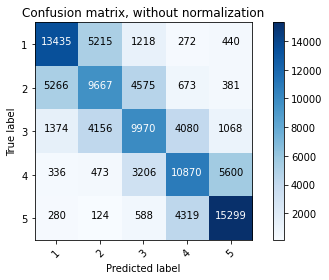

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred_bool,labels=[1,2,3,4,5])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[1,2,3,4,5],
                      title='Confusion matrix, without normalization')

In [ ]:
y_pred_bool[0:5]

array([5, 4, 4, 5, 1])

In [ ]:
np.savetxt('/content/drive/My Drive/y_pred_bool.txt', y_pred_bool, fmt='%d')

In [ ]:
y_pred_bool = np.loadtxt('/content/drive/My Drive/y_pred_bool.txt', dtype=int)

In [ ]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred_bool, average='micro')
print('F1 score: %f' % f1)
f1 = f1_score(y_test, y_pred_bool, average='macro')
print('F1 score: %f' % f1)
f1 = f1_score(y_test, y_pred_bool, average='weighted')
print('F1 score: %f' % f1)

F1 score: 0.575798
F1 score: 0.573445
F1 score: 0.573484


In [ ]:
y_test[y_test != y_pred_bool].head(20)

51736     5
680830    1
121322    5
429670    2
151828    4
133503    5
433131    2
376673    3
318409    3
537913    2
418322    2
88968     5
576082    1
578902    1
391929    3
548460    2
471419    2
618086    1
529414    2
326009    3
Name: overall, dtype: int64

In [ ]:
(y_pred_bool[y_test != y_pred_bool])[0:20]

array([4, 5, 3, 3, 5, 4, 4, 4, 1, 1, 1, 2, 3, 2, 4, 1, 4, 2, 3, 4])

In [ ]:
print("test data len = " + str(len(X_test)))

test data len = 102885


In [ ]:
diff = abs(y_test - y_pred_bool)

In [ ]:
diff.value_counts()

0    59241
1    36417
2     5394
3     1113
4      720
Name: overall, dtype: int64

In [ ]:
print('diffrence between prediction and true test exs in %:')
(diff.value_counts() / len(y_test)) * 100 

diffrence between prediction and true test exs in %:


0    57.579822
1    35.395830
2     5.242747
3     1.081790
4     0.699810
Name: overall, dtype: float64

In [ ]:
y_test[diff == 4].head()

88968     5
570472    1
668482    1
79438     5
11179     5
Name: overall, dtype: int64

In [ ]:
df['reviewText'].loc[[591287]].values

array(['super bleh'], dtype=object)

In [ ]:
y_test[diff == 4].value_counts()

1    824
5    747
Name: overall, dtype: int64

In [ ]:
x_test[1]

'i disappointed'

In [ ]:
word_to_index['deserves']

121797

mean square error

In [ ]:
print("max error = 16, min error = 0")
print("model MSE: = ")
print(((y_test - y_pred_bool) ** 2).mean())

max error = 16, min error = 0
model MSE: = 
0.7820479175778782


In [ ]:
print("max error = 32, min error = 0")
print("model double MSE: = ")
print((((y_test - y_pred_bool)*2) ** 2).mean())

max error = 32, min error = 0
model double MSE: = 
3.1281916703115127


In [ ]:
print("max error = 4, min error = 0")
print("model MAE: = ")
print((abs(y_test - y_pred_bool)).mean())

max error = 4, min error = 0
model MAE: = 
0.5217184234825291


In [ ]:
x_test = np.array(["You were responsive to my urgent shipping needs,Thank you.",
                   "This prouduct is too expensive and i don't like the price",
                   "The Movie was extremly good but a lot of things was not completed",
                   "I wanted to let you know that I am quite pleased with you fast delivery & your product , which works well. As advertised",
                   "As per the subject - your customer service is awesome ",
                   "your website is awesome as are you prices - sold - you have a new customer! THANKS",
                   "The Services Was not good enough after selling. Thank You",
                   "This goes to the wonderful, very helpful, and very knowledgeable team of people",
                   "Love this t-shirt it has a good price too THANKSSS",
                   "Beatuiful movie i like it very much, GOOD TEAM",
                   "The customar services is not effective please take care of the customers",
                   "the materials isn't good enough so the products broke from the second time from the begining of use",
                   "This actions involves racism so it's bad habbits",
                   "i think it is good enough to complete it",
                   "it is very good"])
y_test = np.array([4,2,3,5,5,4,2,4,5,4,1,1,1,4,4])

In [ ]:
x_test = np.array([
"I really recommend this course guys, the instructor is really good!",
"If I was gonna choose between this mobile or any brand this year, this one really stands out.",
"This new trend of nonsense tiktok videos is crap and full of empty minded people with bullshit content.",
"The new Playstation 5 is gonna be awesome! I'm really looking forward to buy It! ",
"This website is a scam guys the products aren't even as posted here in the gallery section, not recommended at all!",
"This mall has the best clothes shops in the block! specially ZARA you gotta check their new line!",
"Saying It's a free to play game but It's a pay to win doesn't make you an honest company! disrespectful act",
"the customer service in this application is just great! I had to wait only 5 secs to contact someone",
"This restaurant is serving a rotten food! If there's a 0 rating I'd give It to this crap",
"A friend of mine recommended me this website, I guess he's not fooling me,great products and quality!",
"This movie is so normal i don't have to watch it again",
"The delivery system is just insanely fast! this is the best online experience I've ever had, straigh",
"I ordered a margarita pizza but It came with vegetables and mushrooms, I said exactly 'margarita without any add ons', terrible experience.",
"Pasta is meant to be a cure for the broken soul, this taste broke my soul even harder than my ex girlfriend did!",
"Back in the day there was the atari 2001, If anyone has It please contact me, I trust this website and Its members as Its not my first question here",
"establishing a new brand that can compete in the smartphone realm is hard, but taking others smartphones and putting your logo on It and sell It with lower price, that's Money laundering and illegal stuff going on here",
"This assistant is really bad, I'll get back to my Google assignment as It's fast and I can relay on!",
"after testing these cameras, they are all great really, But the canon one just feels right into my hand",
"I prefer this gaming store than steam by far! At least every week there's a free game here",
"this new skin of orianna doesn't match her mech-ish look at all, how a robot can go into a pool party",
"balance these products please they 've poor quality.",
"It's okay , this is not the worst this ever",
"I can't think about this game as amusment nor a pain, it's a meh!",
])



y_test = np.array([4,4,1,5,1,4,2,5,1,4,3,5,1,2,3,2,1,5,4,1,2,3,3])

In [ ]:
x_test = np.array([
"First off, loved this product. I’m allergic to eggs so I decided to make my on waffles instead of buying them. So much cheaper. Can make a huge batch and freeze them. Each waffle cooked for 8 minutes and came out a beautiful golden brown.Well fast forward a month and a half. I put waffle batter in, wait 8 minutes and go to take it out, the top is raw! The return window is closed and I’m pissed. I want to order another but don’t know if I really want to take the chance that it’ll happen again.",
"Definitely one of the best purchases I have made on amazon so far. Just as described, it is a mini waffle-maker. The “mini” part is no joke, the whole thing is small enough to lift in one hand. If you are feeding breakfast to a whole family of five or more then this may not be for you. However, because of its size, it works quicker than a normal sized one so even though you can only make one small waffle at a time, each waffle should be done in about a minute or two. The interior is also non-stick so it is really easy to clean which was a huge bonus for me. On top of that, it comes with a little instruction panphlet that tells you how to use and and also include recipes and recipe ideas! Personally, I love it, it’s what I wanted and more",
"I got the blue screen for few times , so far ,,, the screen and the chassic was pretty good built, the keyboard is good too,,,,,,,it can not playback 8k videos on youtube ,,,, edge and Chrome will crashed when you started plays 8k video after 5 sec ",
"The new Ryzen 4000 series makes laptops much more capable at a lower price point. Basic gaming, and browsing done with such efficiency on this platform.Laptop comes with a stylus and a USB C charger to clear out any confusion from the Q&A section.Honestly, price to performance ratio including the flexibility of this laptop is a must buy for this price point!",
"I have been using this laptop for the past 4 days. I had previously been using the Flex 5 14 model 81C9 (https://www.amazon.com/Lenovo-14-Inch-i5-8250U-Windows-81C90009US/dp/B0752V44VD/ref=cm_cr_arp_d_product_top?ie=UTF8) for the past 2 years, and had high hopes for this upgrade to model 81X2 (which only cost $25 more).",
"Pros:1. easy to inflate. The pump works easily. The valves, especially the Boston ones, are easy.2. easy to transport. It doesn't weigh much, and folds into the trunk easily.Cons:1. it moves through the water more like a rubber raft than a kayak. Which is fine in completely flat water with no wind.2. The seat structure provides no support, back or bottom, therefore the paddling angle is severe, and uncomfortable3. I found the oar too short, and therefore requiring lots of work My maiden voyage was in choppy water with lots of wind. I felt tossed around like a wind-sock. I'll use it again, but next time in calm conditions. Can't beat the price. PS. I also drilled a hole in the bottom fin, and attached it via fishing line to the upside of the craft, just to make sure I wouldn't lose it. It didn't come lose, so no problem",
"Great boat for the price!So far we've only taken it out once, but both on a fresh-water river and in the Pacific Ocean.The boat is much sturdier than expected and very comfortable.Issues: one of the straps that hold the seat to the sides has ripped the very first time we launched the boat on the water. This is mainly due to the fact that there is nothing to hold onto the sides and even though the attachment seemed very sturdy it ripped completely off. I'll probably try to sew it back in as its a surface rip. But still - be careful.Two: the material that this boat is made of STINKS like an exploded skunk! I tried to give it some time to aerate and left it unpacked but still when it is packed in the car it gave me a headache due to the intensity of the plastic smell.Three: as other reviewers mentioned - the pedals are too short and the water is dripping in. This is a much smaller issue than the above two so I'm ok with that",
"Seemed like a good buy for the price but it has a design flaw. The Drain Plug in the bottom has a very weak seam around it. I went to plug it as we put the kayak in the water and it pushed right through with very little force applied. This rendered the kayak useless. Dead in the water before we 'got' in the water. The patch kit does not include the glue so if you plan to patch it outdoors you must purchase the glue. Other than this, the seats seemed cheaply made and would easily have popped at the slightest pressure. The rest of the kayak was sturdy and well built. The kayak seems more suited to lakes than rivers. I returned with no hassle, thank you Amazon! I gave an extra star for the price you cant get a cheaper kayak",
"Watch broke in less then a year due to a leak in the watch. sent to company to fix under warranty and they told me that it would cost 130 for a replacement. THEY DON'T BACK UP THERE PIECE OF JUNK. you would get more out of your money by lighting it on fire because at least the fire would keep you warm for a second",
"I thought suunto was a very good brand of watches but I was wrong, I bought it on May 24 this year and look how bad the quality of this watch is very disappointing I think Casio makes better watches than suunto there is no doubt",
"Purchased this as a gift for our guide to Everest Base Camp. We personally use the Casio Pro Trek models but he wanted this one. It was a little difficult to set up. No solar recharge option like Casio. The guides and serious trekkers prefer this but my personal opinion is it is a form and status choice and not a function choice. It is a fine multi-sensor watch that performed well, but it did nothing more or better than Casio Pro Trek at a higher price point",
"First time I looked I saw this watch years ago I wanted it, never pulled trigger because I wasn't a watch guy. Over the last year that has changed and I finally pulled the trigger. Lightweight, Plenty of Features, but the biggest issue was not the watch it was me. A few people have stated the watch is tougher to read, that is 100% firm but the caveat to that is you, mid 40's guy who's just starting the reader glass function yeah it's tough to read, and the light didn't really help me. If a bit younger and better eye site I would say go for it. The negative face is the real issue for me at this price point I truly wish Suunto made another face at this price point",
"Really happy with this watch. Really high quality and works as advertised. Battery still going strong after a year. Lots of functions and the look of the watch is awesome. No issues seeing the display"
])



y_test = np.array([1,5,1,5,2,3,3,2,1,1,3,4,5])

In [ ]:
x_test = np.array([
	"the most bad thing i have ever bought",
	"this product is good",
	"good quality, good material and good service",
	"it's okay, will do the thing",
	"it' so bad",
	"every thing is good but really bad service",
	"helpful and useful",
	"very expensive it doesn't worth it",
	"that's an amazing tool",
	"I don't like the color of this shoe", 
	"I like the customer service of this company",
	"I really recommend this, it's very good",
	"damn you really don't know how to deal with your customers",
	"this product is useful you should get it if you're a beginner",
	"this tool works well",
])
y_test = np.array([1,3,5,2,1,3,4,2,5,3,4,5,1,3,3])

In [ ]:
x_test = np.array([
      "I ordered this because the info indicated that this is an Apple Certified product. After 2 weeks of intermittent use (on a table in my living room) I got the dreaded “this accessory may not be supported” pop up. No worries... ish happens and I requested a replacement. Received that today and I am getting the same pop up with the new cable. No other cable (both Apple and certified products) are doing this. Add to this the fact that now I can only get an Amazon gift card as a refund.",
      "I needed a new lighting cord, especially a longer one (6 feet) so I bought this one in thoughts that the Nylon will make it last longer since that's the idea with nylon braided cables. At first sight and opening the package, it was seemed like it was good quality and it seemed like it was going to be promising but it actually doesn't work. I've plugged it into my charging block which came with my iPad and left it for an hour and when it was time to get up and go, I realized it only charged a couple percentages. Not too long after, it wouldn't even charge, nor would my phone even recognize that it was plugged in. I've used the regular iPhone charging block and nothing happened. I had to go back to using my old frayed cable for the mean time. I guess I just received a defective one?",
      "I had high hopes for this lightning cable as the majority of the reviews were positive and mentioned that it didn't end up fraying after a short amount of time until it just stopped working or became unsafe to use. I use it with no problems for about 3 weeks, and then it started getting kind of temperamental about how the cable had to be positioned which made for some interesting solutions for charging my phone. Still, there was no obvious damage or fraying and the cord looked to be fine, so I continued to use it even if it was slightly annoying to sometimes have to spend some time finding the right position for the cable in order to charge my phone.",
      "I bought this product on 31st August 2017, meaning it's almost been a year and I got the 6 feet Dark Grey model.Let me firstly say that I'm giving this product a 3 star rating just because we don't get the option to rate a product 2.5 stars on Amazon. And also because this product could stay alive for almost an year, which is a lot these days.7 Though the delivery of the product from Amazon was blazing, I would like to specifically mention that this is an Amazon Basics product.",
      "All my non-Apple cables started to display the message on iPhones and iPads that they were unsupported and would no longer charge the device. Apple want £20 for the cable and another £20 for the block. Luckily for all the broken cables and non-runners we have plenty spare. I bought 3 of these together and they work perfectly. Amazons own brand, but I'm impressed. They have thought about the design, so a strengthened neck for inserting into the port (3 standard apple charges of mine have broke in this way), fabric cable for strength and the extra length @ 1.8m for £1 extra was well worth it over the usual 0.9m. Best non-apple cable I've ever bought and have also bought another 2.",
      "I have been using the AmazonBasic Nylon Braided Lightning to USB Cable for almost 2 years. (it's 1 year and 11 months since I bought the cable, to be exact), and I am pretty happy with the cable.I have been using the cable to recharge my iPhone with a battery pack, so as you can imagine I have not been easy on it. I have been rolling up the cable quite a lot, winding it around the battery pack, or stuffing it in my jeans' pocket.",
      "These are good alkaline AAA batteries that alas, arrive rather over extravagantly boxed!Whilst there are cheaper AAA alkaline batteries available on Amazon, these seem as good as any of the high street brands, with a good shelf and working life.",
      "ive got no complaints the batteries so far are ok,hope they continue to do so/ thank you.",
      "Perfect",
      "I purchased this bad boy for my wife’s home office. Let me start off by saying this thing shreds harder than Andy Brinker from the 1998 classic film Brink. For those of you who don’t know, this 99 min film introduced some of the most unique roller blade shredding ever witnessed. Purchase this and you can be shredding like Andy in no time!",
      "I am not someone who uses a paper shredder every day, but when I do, I really use it hard. This shredder was a surprisingly good value and quieter than I expected. That said, my last one overheated and needed to be replaced. This shredder has a 3 minute constant run time and a nice overheat indicator light that should help prevent me from making the same mistake.",
      "This works great! I don't typically test it with the full 8-sheet capacity, but I regularly put mail through that hasn't been opened yet, such as credit card offers, and it handles them just fine. I finally got rid of the huge stack of mail that had been building up on my counter because I didn't want to throw it away but I had lent my old shredder to a friend and never got it back. So, after some research I finally bit the bullet and bought a new one. I do like the cross-cut as my old one just did the strips. I feel this one is more secure, but it's not like I'm shredding secret government documents or million-dollar bank statements. Still, it would take some serious effort to try to put these bits back together.",
      ])
y_test = np.array([1,1,2,3,5,5,4,4,5,4,5,5])

In [ ]:
x_test = np.array([
            "It’s a bummer how expensive it is, but I really enjoy this phone and i don’t regret buying it’s only four stars instead of five because of the price. Realistically if you don’t care about camera quality, any other smartphone will work fine.",
            " The phone is very great, the cameras work really good ",
            " It is really cool I love it",
            "Amazon didn't add any additional protection to the shipping of this physical hard drive. Came in a bubble wrap bag and manufacturer packaging Western Digital Packaging was nice.Rubber feet arent 100% sticky, will slide if pulled by the cord Not Impressed too much. $160 after taxes.Seagate MyBackup Plus 5TB is under $130.",
            " I've purchased five of the 5TB versions so far. I've received one bad cable, but I had a couple of extra cables so it didn't matter. The drives themselves have been great. I've written at least 2TB of data to each of them without problems. I bought them because until now the biggest external USB drive you could get that didn't require an external power supply was 2TB. Now it's up to 5TB and I'm replacing the old ones. I've had good luck over the years with WD. ",
            " I bought this for my Xbox one X and today's games demand hard drive space. with games upwards of 80 - 120 gigs per game average this is a must for me. I have mine loaded with 100 games now and the seek time is still great probably about 3.5 terabytes are used at the moment and going strong! I'm thinking of pairing this with a western digital 2 terabyte ssd or even a 4 terabyte ssd for the extra fast boot time of the system and games. I have done this with my PS4 pro and this does make a huge difference in loading time. ",
            "This is a superb solution to game storage.You can store a vast number of games on here, and play them from the drive. The Games you play while stored on this USB drive play as well as they do as If they were stored locally on the Xbox (built in) drive.",
            "if you look, they are gorgeous, stylish.Today for the first time once they are dressed, it's just horror! Foot feet hurt because there are flat insole, feet stop numb. I'm disappointed with the purchase.",
            " I like the shoes but they run big. I typically wear a 9 1/2 or 10, got these in an 8 1/2 and they fit like 11's, there is A LOT of room. Otherwise they look great and they're Tommy so I would love them. Not as comfortable as expected: no real cushion, I couldn't imagine walking around or standing in them an entire day. I honestly hate to say it but I wouldn't suggest these. ",
            "I received it and left it for a while, then I used it only for one week and it got torn!! Very bad quality not expected from a valuable expensive brand like tommy hilfiger.Tried to return it to a tommy store, they said we need a receipt which definitely I don’t have!I should have a full refund for such a product.",
            "My 16 year olds every day shoe. He only wore vans until he found these. They don't have the stiff new shoe feel and break in easily. They won't last the year as an everyday shoe of a teenage boy but they are good as an alternative shoe, or one that you wear a couple of times a week versus everyday wear",
            " little narrow for my taste my foot length is actually 9.5 to a 10. but really wide so i have to go with larger size to accommodate width that being said this pair an size was still on the narrow side and the soles were not to comfortable but i am gonna wear them occasionally ",
            " Like the shoes, comfortable and I like the look. Thing is it's bigger than I thought, usually wear 12s in other brands and ordered 11.5 and they're a little too big. Probably will get 11 or 10.5 for a better fit. But other than that, the shoes are great. UPDATE 7/16/2016: The quality of the shoes are up there, I've had similar shoes in other brands that would be worn out by now and have the soles torn. I would only advise to do your best to avoid wearing them on rainy days. ",
            " Very disappointed. Ordered a size 9 1/2 and got a pair of shoes that measure size 11. I spent 10 years in the footwear business and this usually means these were manufactured in some third world country under horrible conditions with a huge lack of quality control. Quality shoes are always sized within a 1/2 size and anything this far off would never be released to the market by a reputable company. I'll be returning them and will continue to search for a quality brand. ",
            " Love the quality and price, super cute and trendy! The only reason I gave it 4 stars and not 5 is because it runs really small, and its a little too cropped but its so cute Ill keep it! Feels good on too. I am 5'8 150 lbs I ordered the XL and normally I am a Med to Large so its running a couple sizes small. The color is really a brick red my camera makes it look a little different. Good Buy, I recommend ",
            " Part of the sleeve is literally missing...it looks really stupid because one sleeve is longer than the other. Like really? I was supposed to wear this shirt on New Year’s Eve. What a piece of junk! ",
            " Love the silky but sturdy fabric and the style of the shirt. It does not irritate my skin. I wore it all and felt comfortable. I have washed it several times and it did not lose color. The only problem was to iron the sleeves which requires some time and patience. I wear it with a skirt but you can wear shorts or high waisted pants. ",
            " Cute tee. Ordered size medium which is my usual size. I'm 5'7' and the arm length is good which sometimes can run too short. The overall length is pretty short. It barely reaches the top of my jeans and if I move my arms at all You can see my stomach. I have a C size chest and small waist. Hope that helps. ",
            " Everything is as described - sturdy and safe to use. A bit on the heavy side, but I don't mind because the weight helps me with the muscle exercise. It won't break like the dangerous spring devices. A bit expensive at nearly $70, but you get what you pay for. This thing is very solid and of high quality. I just wished the clamp (which ties the two ends when not in use) were hinged/attached to the device, instead of being a separate piece that you have to take out / put back in ",
            " Great quality, nice design. Don’t come with a guide for different ways to exercise and this could lead to muscle injuries. ",
            "It is far too hard to turn the resistance knob!I would like one of these if the adjuster could be improved so that it is easy to turn, and also instead of the little plastic clip that holds it closed, but easily pops out, a better way should be found to hold it in the closed position, tho if the main adjuster problem was solved I think I could hold it closed with a strong rubber band.",
            " Compact! Great to exercise upper body with a unit that you can take with you anywhere. The hydraulic cylinder is excellent since it returns softly to position. Let's see how it holds over time but so far so good! ",
            " It would be much better if there was a positive and negative resistance, not just positive. ",
            
      ])
y_test = np.array([4,5,5,4,5,5,5,2,3,1,5,3,4,1,4,1,5,4,5,4,1,5,3,])

In [ ]:
x_test = np.array([
        "You were responsive to my urgent shipping needs,Thank you.",
        "This prouduct is too expensive and i don't like the price",
        "The Movie was extremly good but a lot of things was not completed",
        "I wanted to let you know that I am quite pleased with you fast delivery & your product , which works well. As advertised",
        "As per the subject - your customer service is awesome ",
        "your website is awesome as are you prices - sold - you have a new customer! THANKS",
        "The Services Was not good enough after selling. Thank You",
        "This goes to the wonderful, very helpful, and very knowledgeable team of people",
        "Love this t-shirt it has a good price too THANKSSS",
        "Beatuiful movie i like it very much, GOOD TEAM",
        "The customar services is not effective please take care of the customers",
        "the materials isn't good enough so the products broke from the second time from the begining of use",
        "This actions involves racism so it's bad habbits",
        "i think it is good enough to complete it",
        "it is very good",
        "I really recommend this course guys, the instructor is really good!",
        "If I was gonna choose between this mobile or any brand this year, this one really stands out.",
        "This new trend of nonsense tiktok videos is crap and full of empty minded people with bullshit content.",
        "The new Playstation 5 is gonna be awesome! I'm really looking forward to buy It! ",
        "This website is a scam guys the products aren't even as posted here in the gallery section, not recommended at all!",
        "This mall has the best clothes shops in the block! specially ZARA you gotta check their new line!",
        "Saying It's a free to play game but It's a pay to win doesn't make you an honest company! disrespectful act",
        "the customer service in this application is just great! I had to wait only 5 secs to contact someone",
        "This restaurant is serving a rotten food! If there's a 0 rating I'd give It to this crap",
        "A friend of mine recommended me this website, I guess he's not fooling me,great products and quality!",
        "This movie is so normal i don't have to watch it again",
        "The delivery system is just insanely fast! this is the best online experience I've ever had, straigh",
        "I ordered a margarita pizza but It came with vegetables and mushrooms, I said exactly 'margarita without any add ons', terrible experience.",
        "Pasta is meant to be a cure for the broken soul, this taste broke my soul even harder than my ex girlfriend did!",
        "Back in the day there was the atari 2001, If anyone has It please contact me, I trust this website and Its members as Its not my first question here",
        "establishing a new brand that can compete in the smartphone realm is hard, but taking others smartphones and putting your logo on It and sell It with lower price, that's Money laundering and illegal stuff going on here",
        "This assistant is really bad, I'll get back to my Google assignment as It's fast and I can relay on!",
        "after testing these cameras, they are all great really, But the canon one just feels right into my hand",
        "I prefer this gaming store than steam by far! At least every week there's a free game here",
        "this new skin of orianna doesn't match her mech-ish look at all, how a robot can go into a pool party",
        "balance these products please they 've poor quality.",
        "It's okay , this is not the worst this ever",
        "I can't think about this game as amusment nor a pain, it's a meh!",
        "First off, loved this product. I’m allergic to eggs so I decided to make my on waffles instead of buying them. So much cheaper. Can make a huge batch and freeze them. Each waffle cooked for 8 minutes and came out a beautiful golden brown.Well fast forward a month and a half. I put waffle batter in, wait 8 minutes and go to take it out, the top is raw! The return window is closed and I’m pissed. I want to order another but don’t know if I really want to take the chance that it’ll happen again.",
        "Definitely one of the best purchases I have made on amazon so far. Just as described, it is a mini waffle-maker. The “mini” part is no joke, the whole thing is small enough to lift in one hand. If you are feeding breakfast to a whole family of five or more then this may not be for you. However, because of its size, it works quicker than a normal sized one so even though you can only make one small waffle at a time, each waffle should be done in about a minute or two. The interior is also non-stick so it is really easy to clean which was a huge bonus for me. On top of that, it comes with a little instruction panphlet that tells you how to use and and also include recipes and recipe ideas! Personally, I love it, it’s what I wanted and more",
        "I got the blue screen for few times , so far ,,, the screen and the chassic was pretty good built, the keyboard is good too,,,,,,,it can not playback 8k videos on youtube ,,,, edge and Chrome will crashed when you started plays 8k video after 5 sec ",
        "The new Ryzen 4000 series makes laptops much more capable at a lower price point. Basic gaming, and browsing done with such efficiency on this platform.Laptop comes with a stylus and a USB C charger to clear out any confusion from the Q&A section.Honestly, price to performance ratio including the flexibility of this laptop is a must buy for this price point!",
        "I have been using this laptop for the past 4 days. I had previously been using the Flex 5 14 model 81C9 (https://www.amazon.com/Lenovo-14-Inch-i5-8250U-Windows-81C90009US/dp/B0752V44VD/ref=cm_cr_arp_d_product_top?ie=UTF8) for the past 2 years, and had high hopes for this upgrade to model 81X2 (which only cost $25 more).",
        "Pros:1. easy to inflate. The pump works easily. The valves, especially the Boston ones, are easy.2. easy to transport. It doesn't weigh much, and folds into the trunk easily.Cons:1. it moves through the water more like a rubber raft than a kayak. Which is fine in completely flat water with no wind.2. The seat structure provides no support, back or bottom, therefore the paddling angle is severe, and uncomfortable3. I found the oar too short, and therefore requiring lots of work My maiden voyage was in choppy water with lots of wind. I felt tossed around like a wind-sock. I'll use it again, but next time in calm conditions. Can't beat the price. PS. I also drilled a hole in the bottom fin, and attached it via fishing line to the upside of the craft, just to make sure I wouldn't lose it. It didn't come lose, so no problem",
        "Great boat for the price!So far we've only taken it out once, but both on a fresh-water river and in the Pacific Ocean.The boat is much sturdier than expected and very comfortable.Issues: one of the straps that hold the seat to the sides has ripped the very first time we launched the boat on the water. This is mainly due to the fact that there is nothing to hold onto the sides and even though the attachment seemed very sturdy it ripped completely off. I'll probably try to sew it back in as its a surface rip. But still - be careful.Two: the material that this boat is made of STINKS like an exploded skunk! I tried to give it some time to aerate and left it unpacked but still when it is packed in the car it gave me a headache due to the intensity of the plastic smell.Three: as other reviewers mentioned - the pedals are too short and the water is dripping in. This is a much smaller issue than the above two so I'm ok with that",
        "Seemed like a good buy for the price but it has a design flaw. The Drain Plug in the bottom has a very weak seam around it. I went to plug it as we put the kayak in the water and it pushed right through with very little force applied. This rendered the kayak useless. Dead in the water before we 'got' in the water. The patch kit does not include the glue so if you plan to patch it outdoors you must purchase the glue. Other than this, the seats seemed cheaply made and would easily have popped at the slightest pressure. The rest of the kayak was sturdy and well built. The kayak seems more suited to lakes than rivers. I returned with no hassle, thank you Amazon! I gave an extra star for the price you cant get a cheaper kayak",
        "Watch broke in less then a year due to a leak in the watch. sent to company to fix under warranty and they told me that it would cost 130 for a replacement. THEY DON'T BACK UP THERE PIECE OF JUNK. you would get more out of your money by lighting it on fire because at least the fire would keep you warm for a second",
        "I thought suunto was a very good brand of watches but I was wrong, I bought it on May 24 this year and look how bad the quality of this watch is very disappointing I think Casio makes better watches than suunto there is no doubt",
        "Purchased this as a gift for our guide to Everest Base Camp. We personally use the Casio Pro Trek models but he wanted this one. It was a little difficult to set up. No solar recharge option like Casio. The guides and serious trekkers prefer this but my personal opinion is it is a form and status choice and not a function choice. It is a fine multi-sensor watch that performed well, but it did nothing more or better than Casio Pro Trek at a higher price point",
        "First time I looked I saw this watch years ago I wanted it, never pulled trigger because I wasn't a watch guy. Over the last year that has changed and I finally pulled the trigger. Lightweight, Plenty of Features, but the biggest issue was not the watch it was me. A few people have stated the watch is tougher to read, that is 100% firm but the caveat to that is you, mid 40's guy who's just starting the reader glass function yeah it's tough to read, and the light didn't really help me. If a bit younger and better eye site I would say go for it. The negative face is the real issue for me at this price point I truly wish Suunto made another face at this price point",
        "Really happy with this watch. Really high quality and works as advertised. Battery still going strong after a year. Lots of functions and the look of the watch is awesome. No issues seeing the display",
        "the most bad thing i have ever bought",
        "this product is good",
        "good quality, good material and good service",
        "it's okay, will do the thing",
        "it' so bad",
        "every thing is good but really bad service",
        "helpful and useful",
        "very expensive it doesn't worth it",
        "that's an amazing tool",
        "I don't like the color of this shoe", 
        "I like the customer service of this company",
        "I really recommend this, it's very good",
        "damn you really don't know how to deal with your customers",
        "this product is useful you should get it if you're a beginner",
        "this tool works well",
        "I ordered this because the info indicated that this is an Apple Certified product. After 2 weeks of intermittent use (on a table in my living room) I got the dreaded “this accessory may not be supported” pop up. No worries... ish happens and I requested a replacement. Received that today and I am getting the same pop up with the new cable. No other cable (both Apple and certified products) are doing this. Add to this the fact that now I can only get an Amazon gift card as a refund.",
        "I needed a new lighting cord, especially a longer one (6 feet) so I bought this one in thoughts that the Nylon will make it last longer since that's the idea with nylon braided cables. At first sight and opening the package, it was seemed like it was good quality and it seemed like it was going to be promising but it actually doesn't work. I've plugged it into my charging block which came with my iPad and left it for an hour and when it was time to get up and go, I realized it only charged a couple percentages. Not too long after, it wouldn't even charge, nor would my phone even recognize that it was plugged in. I've used the regular iPhone charging block and nothing happened. I had to go back to using my old frayed cable for the mean time. I guess I just received a defective one?",
        "I had high hopes for this lightning cable as the majority of the reviews were positive and mentioned that it didn't end up fraying after a short amount of time until it just stopped working or became unsafe to use. I use it with no problems for about 3 weeks, and then it started getting kind of temperamental about how the cable had to be positioned which made for some interesting solutions for charging my phone. Still, there was no obvious damage or fraying and the cord looked to be fine, so I continued to use it even if it was slightly annoying to sometimes have to spend some time finding the right position for the cable in order to charge my phone.",
        "I bought this product on 31st August 2017, meaning it's almost been a year and I got the 6 feet Dark Grey model.Let me firstly say that I'm giving this product a 3 star rating just because we don't get the option to rate a product 2.5 stars on Amazon. And also because this product could stay alive for almost an year, which is a lot these days.7 Though the delivery of the product from Amazon was blazing, I would like to specifically mention that this is an Amazon Basics product.",
        "All my non-Apple cables started to display the message on iPhones and iPads that they were unsupported and would no longer charge the device. Apple want £20 for the cable and another £20 for the block. Luckily for all the broken cables and non-runners we have plenty spare. I bought 3 of these together and they work perfectly. Amazons own brand, but I'm impressed. They have thought about the design, so a strengthened neck for inserting into the port (3 standard apple charges of mine have broke in this way), fabric cable for strength and the extra length @ 1.8m for £1 extra was well worth it over the usual 0.9m. Best non-apple cable I've ever bought and have also bought another 2.",
        "I have been using the AmazonBasic Nylon Braided Lightning to USB Cable for almost 2 years. (it's 1 year and 11 months since I bought the cable, to be exact), and I am pretty happy with the cable.I have been using the cable to recharge my iPhone with a battery pack, so as you can imagine I have not been easy on it. I have been rolling up the cable quite a lot, winding it around the battery pack, or stuffing it in my jeans' pocket.",
        "These are good alkaline AAA batteries that alas, arrive rather over extravagantly boxed!Whilst there are cheaper AAA alkaline batteries available on Amazon, these seem as good as any of the high street brands, with a good shelf and working life.",
        "ive got no complaints the batteries so far are ok,hope they continue to do so/ thank you.",
        "Perfect",
        "I purchased this bad boy for my wife’s home office. Let me start off by saying this thing shreds harder than Andy Brinker from the 1998 classic film Brink. For those of you who don’t know, this 99 min film introduced some of the most unique roller blade shredding ever witnessed. Purchase this and you can be shredding like Andy in no time!",
        "I am not someone who uses a paper shredder every day, but when I do, I really use it hard. This shredder was a surprisingly good value and quieter than I expected. That said, my last one overheated and needed to be replaced. This shredder has a 3 minute constant run time and a nice overheat indicator light that should help prevent me from making the same mistake.",
        "This works great! I don't typically test it with the full 8-sheet capacity, but I regularly put mail through that hasn't been opened yet, such as credit card offers, and it handles them just fine. I finally got rid of the huge stack of mail that had been building up on my counter because I didn't want to throw it away but I had lent my old shredder to a friend and never got it back. So, after some research I finally bit the bullet and bought a new one. I do like the cross-cut as my old one just did the strips. I feel this one is more secure, but it's not like I'm shredding secret government documents or million-dollar bank statements. Still, it would take some serious effort to try to put these bits back together.",
        "It’s a bummer how expensive it is, but I really enjoy this phone and i don’t regret buying it’s only four stars instead of five because of the price. Realistically if you don’t care about camera quality, any other smartphone will work fine.",
        " The phone is very great, the cameras work really good ",
        " It is really cool I love it",
        "Amazon didn't add any additional protection to the shipping of this physical hard drive. Came in a bubble wrap bag and manufacturer packaging Western Digital Packaging was nice.Rubber feet arent 100% sticky, will slide if pulled by the cord Not Impressed too much. $160 after taxes.Seagate MyBackup Plus 5TB is under $130.",
        " I've purchased five of the 5TB versions so far. I've received one bad cable, but I had a couple of extra cables so it didn't matter. The drives themselves have been great. I've written at least 2TB of data to each of them without problems. I bought them because until now the biggest external USB drive you could get that didn't require an external power supply was 2TB. Now it's up to 5TB and I'm replacing the old ones. I've had good luck over the years with WD. ",
        " I bought this for my Xbox one X and today's games demand hard drive space. with games upwards of 80 - 120 gigs per game average this is a must for me. I have mine loaded with 100 games now and the seek time is still great probably about 3.5 terabytes are used at the moment and going strong! I'm thinking of pairing this with a western digital 2 terabyte ssd or even a 4 terabyte ssd for the extra fast boot time of the system and games. I have done this with my PS4 pro and this does make a huge difference in loading time. ",
        "This is a superb solution to game storage.You can store a vast number of games on here, and play them from the drive. The Games you play while stored on this USB drive play as well as they do as If they were stored locally on the Xbox (built in) drive.",
        "if you look, they are gorgeous, stylish.Today for the first time once they are dressed, it's just horror! Foot feet hurt because there are flat insole, feet stop numb. I'm disappointed with the purchase.",
        " I like the shoes but they run big. I typically wear a 9 1/2 or 10, got these in an 8 1/2 and they fit like 11's, there is A LOT of room. Otherwise they look great and they're Tommy so I would love them. Not as comfortable as expected: no real cushion, I couldn't imagine walking around or standing in them an entire day. I honestly hate to say it but I wouldn't suggest these. ",
        "I received it and left it for a while, then I used it only for one week and it got torn!! Very bad quality not expected from a valuable expensive brand like tommy hilfiger.Tried to return it to a tommy store, they said we need a receipt which definitely I don’t have!I should have a full refund for such a product.",
        "My 16 year olds every day shoe. He only wore vans until he found these. They don't have the stiff new shoe feel and break in easily. They won't last the year as an everyday shoe of a teenage boy but they are good as an alternative shoe, or one that you wear a couple of times a week versus everyday wear",
        " little narrow for my taste my foot length is actually 9.5 to a 10. but really wide so i have to go with larger size to accommodate width that being said this pair an size was still on the narrow side and the soles were not to comfortable but i am gonna wear them occasionally ",
        " Like the shoes, comfortable and I like the look. Thing is it's bigger than I thought, usually wear 12s in other brands and ordered 11.5 and they're a little too big. Probably will get 11 or 10.5 for a better fit. But other than that, the shoes are great. UPDATE 7/16/2016: The quality of the shoes are up there, I've had similar shoes in other brands that would be worn out by now and have the soles torn. I would only advise to do your best to avoid wearing them on rainy days. ",
        " Very disappointed. Ordered a size 9 1/2 and got a pair of shoes that measure size 11. I spent 10 years in the footwear business and this usually means these were manufactured in some third world country under horrible conditions with a huge lack of quality control. Quality shoes are always sized within a 1/2 size and anything this far off would never be released to the market by a reputable company. I'll be returning them and will continue to search for a quality brand. ",
        " Love the quality and price, super cute and trendy! The only reason I gave it 4 stars and not 5 is because it runs really small, and its a little too cropped but its so cute Ill keep it! Feels good on too. I am 5'8 150 lbs I ordered the XL and normally I am a Med to Large so its running a couple sizes small. The color is really a brick red my camera makes it look a little different. Good Buy, I recommend ",
        " Part of the sleeve is literally missing...it looks really stupid because one sleeve is longer than the other. Like really? I was supposed to wear this shirt on New Year’s Eve. What a piece of junk! ",
        " Love the silky but sturdy fabric and the style of the shirt. It does not irritate my skin. I wore it all and felt comfortable. I have washed it several times and it did not lose color. The only problem was to iron the sleeves which requires some time and patience. I wear it with a skirt but you can wear shorts or high waisted pants. ",
        " Cute tee. Ordered size medium which is my usual size. I'm 5'7' and the arm length is good which sometimes can run too short. The overall length is pretty short. It barely reaches the top of my jeans and if I move my arms at all You can see my stomach. I have a C size chest and small waist. Hope that helps. ",
        " Everything is as described - sturdy and safe to use. A bit on the heavy side, but I don't mind because the weight helps me with the muscle exercise. It won't break like the dangerous spring devices. A bit expensive at nearly $70, but you get what you pay for. This thing is very solid and of high quality. I just wished the clamp (which ties the two ends when not in use) were hinged/attached to the device, instead of being a separate piece that you have to take out / put back in ",
        " Great quality, nice design. Don’t come with a guide for different ways to exercise and this could lead to muscle injuries. ",
        "It is far too hard to turn the resistance knob!I would like one of these if the adjuster could be improved so that it is easy to turn, and also instead of the little plastic clip that holds it closed, but easily pops out, a better way should be found to hold it in the closed position, tho if the main adjuster problem was solved I think I could hold it closed with a strong rubber band.",
        " Compact! Great to exercise upper body with a unit that you can take with you anywhere. The hydraulic cylinder is excellent since it returns softly to position. Let's see how it holds over time but so far so good! ",
        " It would be much better if there was a positive and negative resistance, not just positive. ",
                   ])
y_test = np.array([4,2,3,5,5,4,2,4,5,4,1,1,1,4,4,4,4,1,5,1,4,2,5,1,4,3,5,1,2,3,2,1,5,4,1,2,3,3,1,5,1,5,2,3,3,2,1,1,3,4,5,1,3,5,2,1,3,4,2,5,3,4,5,1,3,3,1,1,2,3,5,5,4,4,5,4,5,5,4,5,5,4,5,5,5,2,3,1,5,3,4,1,4,1,5,4,5,4,1,5,3,])

In [ ]:

for i in range(len(x_test)):
  x_test[i] = cleaned_text_method2(x_test[i])
X_test_indices = sentences_to_indices(x_test, word_to_index, maxLen)
y_pred = model.predict(X_test_indices)
y_pred[:,3] = y_pred[:,3] + 0.02
y_pred[:,4] = y_pred[:,4] - 0.02
#print(y_pred)
y_pred_bool = np.argmax(y_pred, axis=1)
y_pred_bool = y_pred_bool + 1
print(y_test)
print(y_pred_bool)

[4 2 3 5 5 4 2 4 5 4 1 1 1 4 4 4 4 1 5 1 4 2 5 1 4 3 5 1 2 3 2 1 5 4 1 2 3
 3 1 5 1 5 2 3 3 2 1 1 3 4 5 1 3 5 2 1 3 4 2 5 3 4 5 1 3 3 1 1 2 3 5 5 4 4
 5 4 5 5 4 5 5 4 5 5 5 2 3 1 5 3 4 1 4 1 5 4 5 4 1 5 3]
[5 2 3 5 5 5 1 5 5 5 1 2 1 4 4 5 5 1 5 1 5 1 5 1 5 1 5 1 1 1 5 1 5 3 2 1 3
 2 1 5 3 5 5 3 3 2 1 1 3 3 5 1 4 5 3 1 1 5 1 5 2 4 5 1 4 5 1 1 2 3 5 5 4 5
 5 1 4 4 4 5 5 2 1 5 5 2 3 1 4 3 4 1 4 1 5 3 4 4 3 5 2]


Confusion matrix, without normalization
[[18  2  2  0  0]
 [ 5  4  1  0  2]
 [ 3  3  8  2  1]
 [ 1  1  3  8 10]
 [ 1  0  0  4 22]]


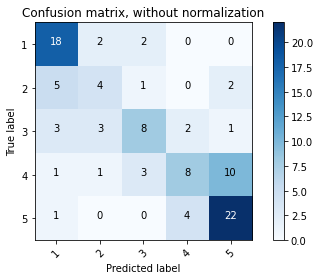

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred_bool,labels=[1,2,3,4,5])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[1,2,3,4,5],
                      title='Confusion matrix, without normalization')

In [ ]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred_bool, average='micro')
print('F1 score: %f' % f1)
f1 = f1_score(y_test, y_pred_bool, average='macro')
print('F1 score: %f' % f1)
f1 = f1_score(y_test, y_pred_bool, average='weighted')
print('F1 score: %f' % f1)

F1 score: 0.584158
F1 score: 0.537691
F1 score: 0.561637


In [ ]:
print("test data len = " + str(len(x_test)))
diff = pd.DataFrame(abs(y_test - y_pred_bool))
diff[0].value_counts()
print('diffrence between prediction and true test exs in %:')
(diff[0].value_counts() / len(y_test)) * 100 


test data len = 101
diffrence between prediction and true test exs in %:


0    59.405941
1    28.712871
2     6.930693
3     3.960396
4     0.990099
Name: 0, dtype: float64

*italicized text*#ordinal classification model

#ordinal classification model


##load dataframe

In [ ]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_pickle('/content/drive/My Drive/finad_filterd_df_100.pkl')

In [ ]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
print(len(df_train))
print(len(df_test))

6584604
1646151


In [ ]:
df_train['overall'].value_counts()

4    1317513
2    1317326
3    1317274
5    1316422
1    1316069
Name: overall, dtype: int64

In [ ]:
df_test['overall'].value_counts()

1    330082
5    329729
3    328877
2    328825
4    328638
Name: overall, dtype: int64

In [ ]:
bigger_than_1 = (df_train['overall'] > 1.0)
#bigger_than_2 = (df_train['overall'] > 2.0)
#bigger_than_3 = (df_train['overall'] > 3.0)
#bigger_than_4 = (df_train['overall'] > 4.0)

In [ ]:
bigger_than_1.value_counts()

True     5268535
False    1316069
Name: overall, dtype: int64

solve impalance class

In [ ]:
df_lower = df_train[bigger_than_1 == False]

In [ ]:
print(len(df_lower))

1316069


In [ ]:
df_lower['overall'].value_counts()

1    1316069
Name: overall, dtype: int64

In [ ]:
df_upper = df_train[bigger_than_1][0:1316069]

In [ ]:
print(len(df_upper))

1316069


In [ ]:
df_upper['overall'].value_counts()

2    329379
5    329085
3    328830
4    328775
Name: overall, dtype: int64

In [ ]:
#
X = pd.concat([df_lower, df_upper], ignore_index=True, sort =False)


In [ ]:
X['overall'].value_counts()

1    1316069
2     329379
5     329085
3     328830
4     328775
Name: overall, dtype: int64

In [ ]:
X = shuffle(X, random_state=42)


In [ ]:
y = (X['overall'] > 1.0).map({True: 1, False: 0})

In [ ]:
y.value_counts()

1    1316069
0    1316069
Name: overall, dtype: int64

In [ ]:
X = X['reviewText']

In [ ]:
#for other dataset
#X_test = X
#y_test = y

In [ ]:
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

In [ ]:
print(len(X_train))
print(len(X_test))

2500531
131607


In [ ]:
y_train.value_counts()

0    1250485
1    1250046
Name: overall, dtype: int64

In [ ]:
y_test.value_counts()

1    66023
0    65584
Name: overall, dtype: int64

## setup X Y for training

In [ ]:
#
#maxLen = max(X_train.str.split().str.len())
maxLen = 99
print(maxLen)

99


In [ ]:
#
X_train_indices = sentences_to_indices(X_train, word_to_index, maxLen)

In [ ]:
#X_train_indices, y_train = shuffle(X_train_indices, y_train, random_state=42)

In [ ]:
print(y_train.shape)
print(X_train.shape)
print(X_train_indices.shape)

(2500531,)
(2500531,)
(2500531, 99)


##train

In [ ]:
#
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Conv1D, MaxPooling1D

from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
#
NB_WORDS = len(word_to_index)+1 # Parameter indicating the number of words we'll put in the dictionary
NB_START_EPOCHS = 15  # Number of epochs we usually start to train with
BATCH_SIZE = 256  # Size of the batches used in the mini-batch gradient descent
MAX_LEN = maxLen  # Maximum number of words in a sequence
GLOVE_DIM = 50  # Number of dimensions of the GloVe word embeddings

In [ ]:
#
model=Sequential()
model.add(Embedding(NB_WORDS, GLOVE_DIM, input_length=MAX_LEN,weights=[emb_matrix], trainable=False))
model.add(LSTM(128 , return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128 , return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 99, 50)            20000050  
_________________________________________________________________
lstm_8 (LSTM)                (None, 99, 128)           91648     
_________________________________________________________________
dropout_8 (Dropout)          (None, 99, 128)           0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 50)                6450      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                

In [ ]:
#
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#
# checkpoint
filepath="/content/drive/My Drive/small_model_1.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [ ]:
#
model.load_weights('/content/drive/My Drive/small_model_1.h5')

In [ ]:
#
model.fit(X_train_indices, y_train, validation_split=0.053, epochs = NB_START_EPOCHS, batch_size = BATCH_SIZE, callbacks=callbacks_list)

Epoch 1/15
9250/9251 [============================>.] - ETA: 0s - loss: 0.4581 - accuracy: 0.7837
Epoch 00001: val_accuracy improved from -inf to 0.79940, saving model to /content/drive/My Drive/small_model_1.h5
9251/9251 [==============================] - 204s 22ms/step - loss: 0.4581 - accuracy: 0.7837 - val_loss: 0.4340 - val_accuracy: 0.7994
Epoch 2/15
9250/9251 [============================>.] - ETA: 0s - loss: 0.4129 - accuracy: 0.8108
Epoch 00002: val_accuracy improved from 0.79940 to 0.81693, saving model to /content/drive/My Drive/small_model_1.h5
9251/9251 [==============================] - 203s 22ms/step - loss: 0.4129 - accuracy: 0.8108 - val_loss: 0.3995 - val_accuracy: 0.8169
Epoch 3/15
9251/9251 [==============================] - ETA: 0s - loss: 0.3955 - accuracy: 0.8203
Epoch 00003: val_accuracy improved from 0.81693 to 0.82185, saving model to /content/drive/My Drive/small_model_1.h5
9251/9251 [==============================] - 202s 22ms/step - loss: 0.3955 - accuracy:

In [ ]:
model.save_weights('/content/drive/My Drive/small_model_1.h5', overwrite=True)

##test

In [ ]:
#
X_test_indices = sentences_to_indices(X_test, word_to_index, maxLen)

In [ ]:
print(X_test_indices.shape)
print(y_test.shape)

(131607, 99)
(131607,)


In [ ]:
#
loss, acc = model.evaluate(X_test_indices, y_test)
print()
print("Test accuracy = ", acc)

4113/4113 [==============================] - 22s 5ms/step - loss: 0.3852 - accuracy: 0.8261

Test accuracy =  0.8261034488677979


In [ ]:
y_pred = model.predict(X_test_indices)

In [ ]:
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0

In [ ]:
y_test.head(5)

2203543    1
224953     0
474798     0
172045     0
1933512    1
Name: overall, dtype: int64

In [ ]:
y_pred[0:5]

array([[1.],
       [0.],
       [0.],
       [0.],
       [1.]], dtype=float32)

In [ ]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average='micro')
print('F1 score: %f' % f1)
f1 = f1_score(y_test, y_pred, average='macro')
print('F1 score: %f' % f1)
f1 = f1_score(y_test, y_pred, average='weighted')
print('F1 score: %f' % f1)

F1 score: 0.826103
F1 score: 0.825826
F1 score: 0.825803


total test

In [ ]:
maxLen = 99

In [ ]:
X_test_indices = sentences_to_indices(df_test['reviewText'], word_to_index, maxLen)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Conv1D, MaxPooling1D

In [ ]:
NB_WORDS = len(word_to_index)+1 # Parameter indicating the number of words we'll put in the dictionary
NB_START_EPOCHS = 15  # Number of epochs we usually start to train with
BATCH_SIZE = 256  # Size of the batches used in the mini-batch gradient descent
MAX_LEN = maxLen  # Maximum number of words in a sequence
GLOVE_DIM = 50  # Number of dimensions of the GloVe word embeddings

In [ ]:
def get_model():
  model=Sequential()
  model.add(Embedding(NB_WORDS, GLOVE_DIM, input_length=MAX_LEN,weights=[emb_matrix], trainable=False))
  model.add(LSTM(128 , return_sequences=True))
  model.add(Dropout(0.2))
  model.add(LSTM(128 , return_sequences=False))
  model.add(Dropout(0.2))
  model.add(Dense(50, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  #model.summary()
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [ ]:
model1 = get_model()
model1.load_weights('/content/drive/My Drive/small_model_1.h5')
y_pred_1 = model1.predict(X_test_indices)

In [ ]:
y_pred_1[0:5]

array([[0.3649582 ],
       [0.9984219 ],
       [0.39855558],
       [0.9914478 ],
       [0.9240282 ]], dtype=float32)

In [ ]:
model2 = get_model()
model2.load_weights('/content/drive/My Drive/small_model_2.h5')
y_pred_2 = model2.predict(X_test_indices)

In [ ]:
y_pred_2[0:5]

array([[0.04398169],
       [0.9998512 ],
       [0.19303231],
       [0.9929468 ],
       [0.6613793 ]], dtype=float32)

In [ ]:
model3 = get_model()
model3.load_weights('/content/drive/My Drive/small_model_3.h5')
y_pred_3 = model3.predict(X_test_indices)

In [ ]:
y_pred_3[0:5]

array([[0.0027517 ],
       [0.9979225 ],
       [0.00586233],
       [0.98927003],
       [0.19570817]], dtype=float32)

In [ ]:
model4 = get_model()
model4.load_weights('/content/drive/My Drive/small_model_4.h5')
y_pred_4 = model4.predict(X_test_indices)

In [ ]:
y_pred_4[0:5]

array([[0.06275988],
       [0.92198443],
       [0.00108722],
       [0.8353861 ],
       [0.02086732]], dtype=float32)

In [ ]:
prob_1 = 1 - y_pred_1
prob_2 = y_pred_1 - y_pred_2
prob_3 = y_pred_2 - y_pred_3
prob_4 = y_pred_3 - y_pred_4
prob_5 = y_pred_4

In [ ]:
prob_1[:,0].shape

(1646151,)

In [ ]:
rows = len(df_test['reviewText'])
y_pred = np.zeros((rows, 5))
y_pred[:,0] = prob_1[:,0]
y_pred[:,1] = prob_2[:,0]
y_pred[:,2] = prob_3[:,0]
y_pred[:,3] = prob_4[:,0]
y_pred[:,4] = prob_5[:,0]

In [ ]:
y_pred[0:5,:]

array([[ 0.63504183,  0.3209765 ,  0.04122998, -0.06000817,  0.06275988],
       [ 0.00157809, -0.00142932,  0.00192875,  0.07593805,  0.92198443],
       [ 0.60144442,  0.20552327,  0.18716997,  0.00477512,  0.00108722],
       [ 0.00855219, -0.001499  ,  0.00367677,  0.15388393,  0.8353861 ],
       [ 0.07597178,  0.26264894,  0.46567112,  0.17484085,  0.02086732]])

In [ ]:
y_pred_bool = np.argmax(y_pred, axis=1)
y_pred_bool = y_pred_bool + 1

In [ ]:
y_pred_bool[0:5]

array([1, 5, 1, 5, 3])

In [ ]:
y_test = df_test['overall'].values.astype(int)

In [ ]:
y_test[0:5]

array([2, 4, 2, 4, 2])

Multi-class Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [ ]:

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[299251  11836   5204   2281  11510]
 [225821  48118  30069   8585  16232]
 [ 94856  38311  92858  45220  57632]
 [ 20194   7398  28904  70101 202041]
 [  9496   1532   3770  12329 302602]]


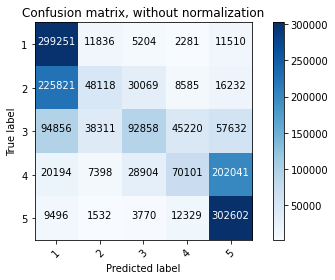

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred_bool,labels=[1,2,3,4,5])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[1,2,3,4,5],
                      title='Confusion matrix, without normalization')

In [ ]:
y_pred_bool[0:5]

array([5, 4, 4, 5, 1])

In [ ]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred_bool, average='micro')
print('F1 score: %f' % f1)
f1 = f1_score(y_test, y_pred_bool, average='macro')
print('F1 score: %f' % f1)
f1 = f1_score(y_test, y_pred_bool, average='weighted')
print('F1 score: %f' % f1)

F1 score: 0.493837
F1 score: 0.433802
F1 score: 0.434073


In [ ]:
print("test data len = " + str(len(y_test)))

test data len = 84000


In [ ]:
diff = pd.DataFrame(abs(y_test - y_pred_bool))

In [ ]:
type(diff)

pandas.core.frame.DataFrame

In [ ]:
diff[0].value_counts()

0    812930
1    594531
2    177445
3     40239
4     21006
Name: 0, dtype: int64

In [ ]:
print('diffrence between prediction and true test exs in %:')
(diff[0].value_counts() / len(y_test)) * 100 

diffrence between prediction and true test exs in %:


0    49.383684
1    36.116432
2    10.779388
3     2.444429
4     1.276068
Name: 0, dtype: float64

In [ ]:
x_test = np.array(['not feeling good', 'i disappointed','i waste my mony',
                   'this is a bad movie' , 'i think it is not bad', 'not happy to see this',
                   'happy to see this', 'not happy end' , 'this actor if idiot', 'i will buy it again' ,
                   'i will not buy it' , 'overrated', 'the worst thing i ever seen',
                   'i think it do not Deserve this high rate', 'i think it do not Deserve this low rate',
                   'i will give it high rate', 'the best ever', 'not bad', 'good', 'poor quality', 'good quality'])
for i in range(len(x_test)):
  x_test[i] = cleaned_text_method2(x_test[i])
print(x_test)
X_test_indices = sentences_to_indices(x_test, word_to_index, maxLen)
print((model.predict(X_test_indices)))
#print(x_test[0] +' '+  np.argmax(model.predict(X_test_indices))[1] + 1)

['not feeling good' 'disappointed' 'waste mony' 'bad movie'
 'think not bad' 'not happy see' 'happy see' 'not happy end' 'actor idiot'
 'buy' 'not buy' 'overrated' 'worst thing ever seen'
 'think not deserve high rate' 'think not deserve low rate'
 'give high rate' 'best ever' 'not bad' 'good' 'poor quality'
 'good quality']
[[1.57e-01 4.17e-01 3.35e-01 6.21e-02 2.89e-02]
 [4.53e-01 4.14e-01 1.25e-01 7.13e-03 9.09e-04]
 [7.83e-01 1.90e-01 2.39e-02 2.23e-03 1.27e-03]
 [7.39e-01 2.31e-01 2.71e-02 2.33e-03 1.07e-03]
 [2.14e-02 1.27e-01 5.41e-01 2.62e-01 4.88e-02]
 [5.11e-01 3.44e-01 1.27e-01 1.38e-02 3.65e-03]
 [2.20e-02 2.20e-02 9.50e-02 3.10e-01 5.51e-01]
 [3.64e-01 3.95e-01 2.10e-01 2.49e-02 5.97e-03]
 [5.87e-01 2.45e-01 8.73e-02 3.97e-02 4.15e-02]
 [6.24e-02 4.28e-02 1.08e-01 2.52e-01 5.36e-01]
 [8.36e-01 1.31e-01 2.93e-02 2.62e-03 1.24e-03]
 [3.84e-01 4.32e-01 1.67e-01 1.40e-02 2.20e-03]
 [9.09e-01 8.22e-02 8.59e-03 4.61e-04 1.84e-04]
 [4.46e-01 2.25e-01 1.98e-01 7.41e-02 5.71e-02]
 